/data/zju/ty/miniconda/envs/celloracle/lib/python3.8/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/data/zju/ty/miniconda/envs/celloracle/lib/python3.8/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(dna: str) -> int:
/data/

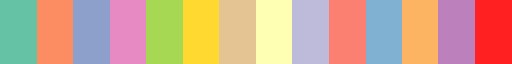

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import celloracle as co
import matplotlib
%matplotlib inline

plt.rcParams['figure.figsize'] = [6, 4.5]
plt.rcParams["savefig.dpi"] = 300
colorlist = ["#66C2A5", "#FC8D62", "#8DA0CB","#E78AC3","#A6D854", "#FFD92F", "#E5C494", "#FFFFB3", "#BEBADA", "#FB8072","#80B1D3" ,"#FDB462", "#BC80BD","#ff2121"]
matplotlib.colors.ListedColormap(colorlist, name='colorlist')

In [106]:
adata = co.data_conversion.seurat_object_to_anndata('/home/zju/tianfeng/single_cell_atlas/processed_data_file/ctrl_filtered.rds', delete_tmp_file=True)['SCT']

input file name: /home/zju/tianfeng/single_cell_atlas/processed_data_file/ctrl_filtered.rds


Attaching SeuratObject
loading seurat object ...
  seurat object version is 3x
Processing an assay: RNA
Processing an assay: SCT


making AnnData ...
2 assays found in the seurat object.
Data is exported as multiple files.
If the seurat object was made by integrating multiple files, please be careful about 'Simpson's effect' in the inferred GRN.
Go to CellOracle web documentation for detailed information about this issue.


In [108]:
for i in adata.obs.keys():
    # deal with R factors
    if adata.obs[i].dtype==object:
        adata.obs[i] = adata.obs[i].astype(str)

In [109]:
sc.write("/home/zju/tianfeng/single_cell_atlas/processed_data_file/ctrl_filtered.h5ad", adata)

... storing 'orig.ident' as categorical
... storing 'seurat_clusters' as categorical
... storing 'active_ident' as categorical


In [32]:
base_GRN = co.data.load_drosophila_promoter_base_GRN()
# adata = sc.read_h5ad("/data/zju/tianfeng/workspace/tianfeng/single_cell_atlas/processed_data_file/ctrl_velo.h5ad")

Loading prebuilt promoter base-GRN. Version: dm6_CisBPv2_fpr2


In [35]:
for i in base_GRN.keys():
    print(i)

peak_id
gene_short_name
AP-2
Abd-B
Adf1
Aef1
Antp
Asciz
Atf-2
Atf3
Atf6
Awh
B-H1
B-H2
BEAF-32
BRC1_DROME
Bgb
Blimp-1
BtbVII
Bteb2
C15
CG10654
CG10904
CG11085
CG11294
CG11504
CG11617
CG12155
CG12219
CG12236
CG12605
CG12768
CG12769
CG14667
CG14860
CG15601
CG15696
CG17802
CG18619
CG2052
CG2808
CG3065
CG31388
CG32105
CG32532
CG33557
CG3407
CG3838
CG3919
CG42741
CG4360
CG43689
CG4404
CG4424
CG4854
CG4956
CG5180
CG5369
CG5953
CG6272
CG6276
CG7045
CG7046
CG7368
CG7386
CG7745
CG7786
CG7818
CG7928
CG8145
CG8281
CG8319
CG8765
CG9727
CG9876
CHES-1-like
CTCF
Cdc5
Cf2
Chrac-14
Clamp
Clk
Coop
CrebA
CrebB-17A
D
D1
D19A
D19B
Dfd
Dif
Dip3
Dll
Doc1
Doc2
Doc3
Dp
Dr
Dref
E(spl)m3-HLH
E(spl)m5-HLH
E(spl)m7-HLH
E(spl)m8-HLH
E(spl)mbeta-HLH
E(spl)mdelta-HLH
E(spl)mgamma-HLH
E2f
E2f2
E5
ERR
EcR
Eip74EF
Eip75B
Eip93F
Ets21C
Ets65A
Ets96B
Ets97D
Ets98B
FBgn0262975
Fer1
Fer2
Fer3
FoxP
GATAd
GATAe
Gsc
H15
HGTX
HLH106
HLH3B
HLH4C
HLH54F
Hand
Her
Hey
HmgZ
Hnf4
Hr38
Hr39
Hr4
Hr46
Hr51
Hr78
Hr83
Hr96
Hsf
Jra
Kah
Kdm2

In [7]:
base_GRN.head()

,peak_id,gene_short_name,AP-2,Abd-B,Adf1,Aef1,Antp,Asciz,Atf-2,Atf3,...,usp,vfl,vnd,vri,vvl,wor,yps,z,zen,zen2
0,chr2L_10002636_10002831,SoYb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chr2L_10002832_10003932,Ndf,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,chr2L_10004943_10006043,asRNA:CR44873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,chr2L_10008381_10009353,Trp1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chr2L_10009354_10010454,Trp1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
adata = sc.read("/home/zju/tianfeng/single_cell_atlas/processed_data_file/ctrl_filtered.h5ad")

In [114]:
adata.X.todense()

matrix([[0.       , 0.       , 0.       , ..., 1.0986123, 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 1.7917595, 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 1.0986123, 0.       ,
         0.       ]], dtype=float32)

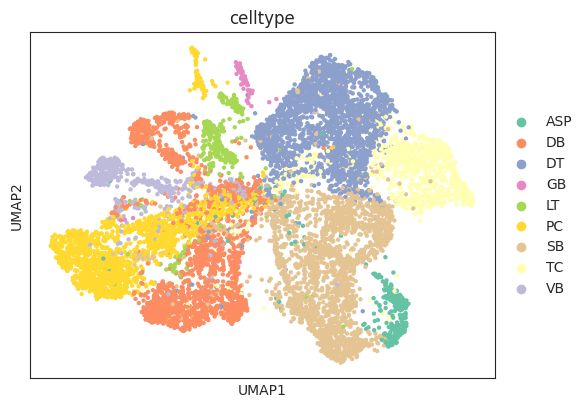

In [110]:
# sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
# sc.pp.normalize_total(adata, target_sum=1e4)
# sc.pp.log1p(adata)
# sc.pp.highly_variable_genes(adata)

# sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=50, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['celltype'], size=40, palette = colorlist)

In [4]:
# preprocess
sc.pp.highly_variable_genes(adata, "spliced", flavor='seurat_v3', n_top_genes=3000, subset=True)

In [5]:
# Check data in anndata

print(f"Cell number is :{adata.shape[0]}")
print(f"Gene number is :{adata.shape[1]}")
print("Metadata columns :", list(adata.obs.columns))
print("Dimensional reduction: ", list(adata.obsm.keys()))

Cell number is :9615
Gene number is :3000
Metadata columns : ['orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'nCount_ambiguous', 'nFeature_ambiguous', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.1', 'seurat_clusters', 'Classification1']
Dimensional reduction:  ['X_pca', 'X_umap']


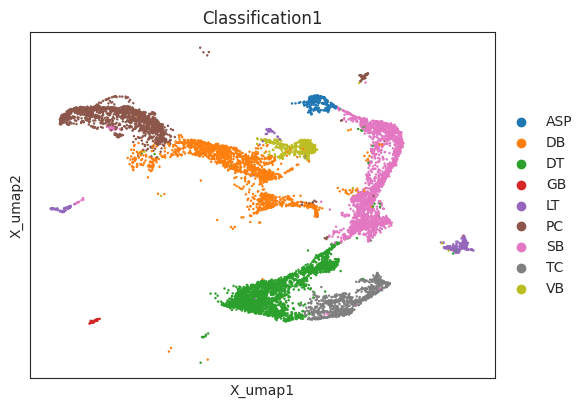

In [6]:
adata.X = adata.layers["spliced"].copy()

# Instantiate Oracle object
oracle = co.Oracle()
oracle.import_anndata_as_raw_count(adata=adata,
                                   cluster_column_name="Classification1",
                                   embedding_name="X_umap")
oracle.import_TF_data(TF_info_matrix=base_GRN)

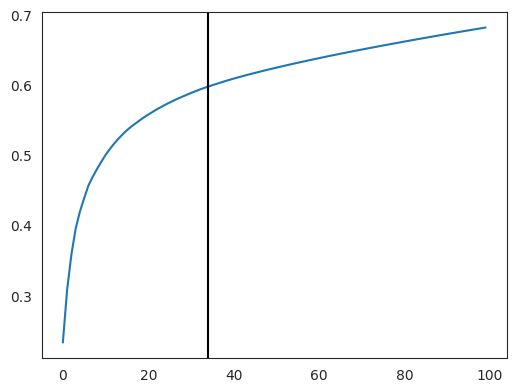

34


In [7]:
# Perform PCA
oracle.perform_PCA()

# Select important PCs
plt.plot(np.cumsum(oracle.pca.explained_variance_ratio_)[:100])
n_comps = np.where(np.diff(np.diff(np.cumsum(oracle.pca.explained_variance_ratio_))>0.002))[0][0]
plt.axvline(n_comps, c="k")
plt.show()
print(n_comps)
n_comps = min(n_comps, 50)

In [8]:
k = int(0.025*oracle.adata.shape[0])
print(f"Auto-selected k is: {k}")
oracle.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*8,
                      b_maxl=k*4, n_jobs=12)

Auto-selected k is: 240


In [9]:
oracle.to_hdf5("../processed_data_file/ctrl.celloracle.oracle")

In [10]:
oracle.adata

AnnData object with n_obs × n_vars = 9615 × 3000
    obs: 'orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'nCount_ambiguous', 'nFeature_ambiguous', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.1', 'seurat_clusters', 'Classification1'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'symbol', 'isin_top1000_var_mean_genes', 'isin_TFdict_targets', 'isin_TFdict_regulators'
    uns: 'hvg', 'log1p', 'Classification1_colors'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'raw_count', 'normalized_count', 'imputed_count'

In [11]:
oracle.adata.uns['Classification1_colors']

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22']

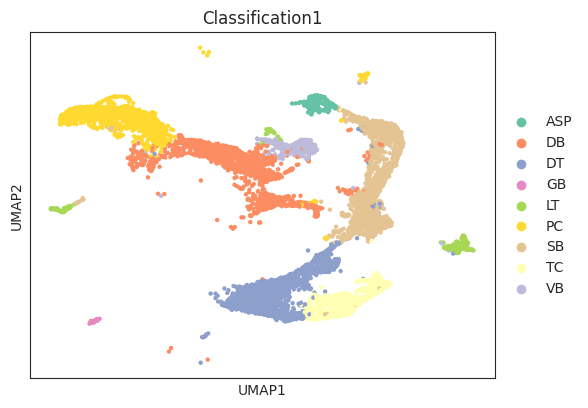

In [12]:
# Check clustering data
sc.pl.umap(adata, color=['Classification1'], size=40, palette = colorlist)

In [ ]:
links = oracle.get_links(cluster_name_for_GRN_unit="Classification1", alpha=10, verbose_level=10)

In [ ]:
print(links.links_dict.keys())
links.links_dict["PC"]

dict_keys(['ASP', 'DB', 'DT', 'GB', 'LT', 'PC', 'SB', 'TC', 'VB'])


,source,target,coef_mean,coef_abs,p,-logp
0,schlank,14-3-3epsilon,0.575472,0.575472,1.521723e-43,42.817664
1,h,18w,0.263972,0.263972,3.691479e-07,6.432800
2,slp1,18w,-0.041821,0.041821,5.909911e-06,5.228419
3,ato,18w,0.000000,0.000000,NaN,-0.000000
4,E(spl)m5-HLH,18w,-0.051013,0.051013,9.473353e-02,1.023496
...,...,...,...,...,...,...
34144,knrl,zyd,-0.011915,0.011915,4.413468e-07,6.355220
34145,pnr,zyd,0.007623,0.007623,1.000814e-08,7.999647
34146,vvl,zyd,-0.005671,0.005671,1.347489e-01,0.870475
34147,dve,zyd,-0.008340,0.008340,3.145404e-11,10.502324


In [ ]:
# Set cluster name
cluster = "PC"

# Save as csv
links.links_dict[cluster].to_csv(f"../data_tables/raw_GRN_for_{cluster}.csv")

In [ ]:
links.filter_links(p=0.001, weight="coef_abs", threshold_number=2000)
links.to_hdf5(file_path="../processed_data_file/links.celloracle.links")

In [ ]:
links.plot_scores_as_rank(cluster="PC", n_gene=30)

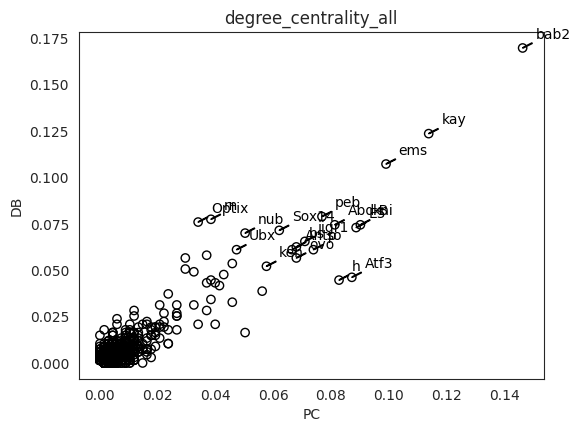

In [ ]:
# Compare GRN score between two clusters
links.plot_score_comparison_2D(value="degree_centrality_all",
                               cluster1="PC", cluster2="DB",
                               percentile=98)

kni


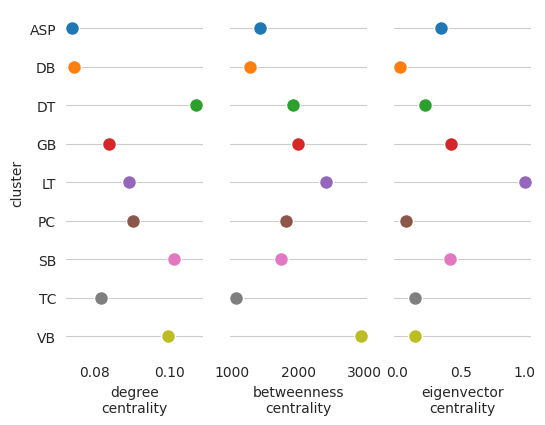

In [ ]:
# Visualize key regulator network score dynamics
links.plot_score_per_cluster(goi="kni")

## load h5ad file

In [2]:
oracle = co.load_hdf5("../processed_data_file/ctrl.celloracle.oracle")
links = co.load_hdf5("../processed_data_file/links.celloracle.links")

# in silico TF perturbation

In [3]:
oracle.get_cluster_specific_TFdict_from_Links(links_object=links)
oracle.fit_GRN_for_simulation(alpha=10,
                              use_cluster_specific_TFdict=True)

  0%|          | 0/9 [00:00<?, ?it/s]

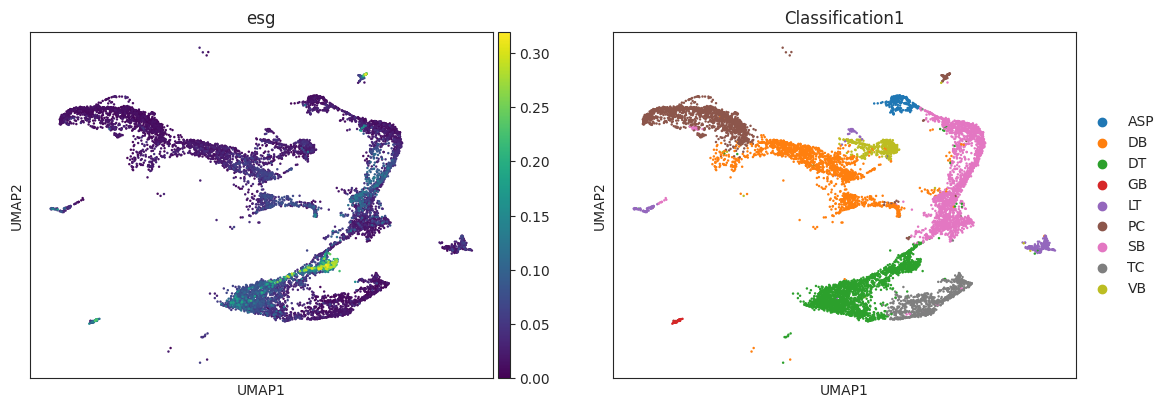

In [4]:
# Check gene expression
goi = "esg"
sc.pl.umap(oracle.adata, color=[goi, oracle.cluster_column_name],
                 layer="imputed_count", use_raw=False, cmap="viridis")

In [7]:
# Enter perturbation conditions to simulate signal propagation after the perturbation.
oracle.simulate_shift(perturb_condition={goi: 0.5}, n_propagation=3)

# Get transition probability
oracle.estimate_transition_prob(n_neighbors=200, knn_random=True, sampled_fraction=1)

# Calculate embedding
oracle.calculate_embedding_shift(sigma_corr=0.05)

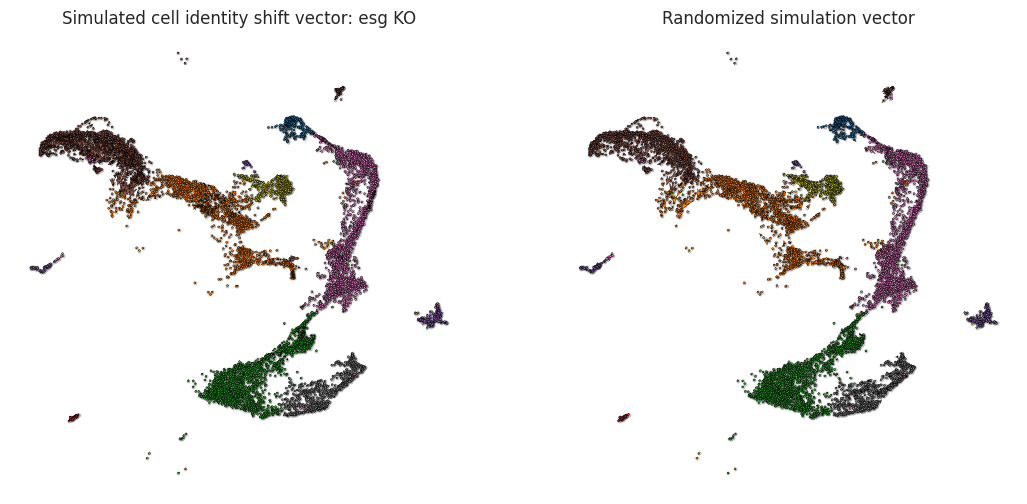

In [8]:
fig, ax = plt.subplots(1, 2,  figsize=[13, 6])

scale = 40
# Show quiver plot
oracle.plot_quiver(scale=scale, ax=ax[0])
ax[0].set_title(f"Simulated cell identity shift vector: {goi} KO")

# Show quiver plot that was calculated with randomized graph.
oracle.plot_quiver_random(scale=scale, ax=ax[1])
ax[1].set_title(f"Randomized simulation vector")

plt.show()

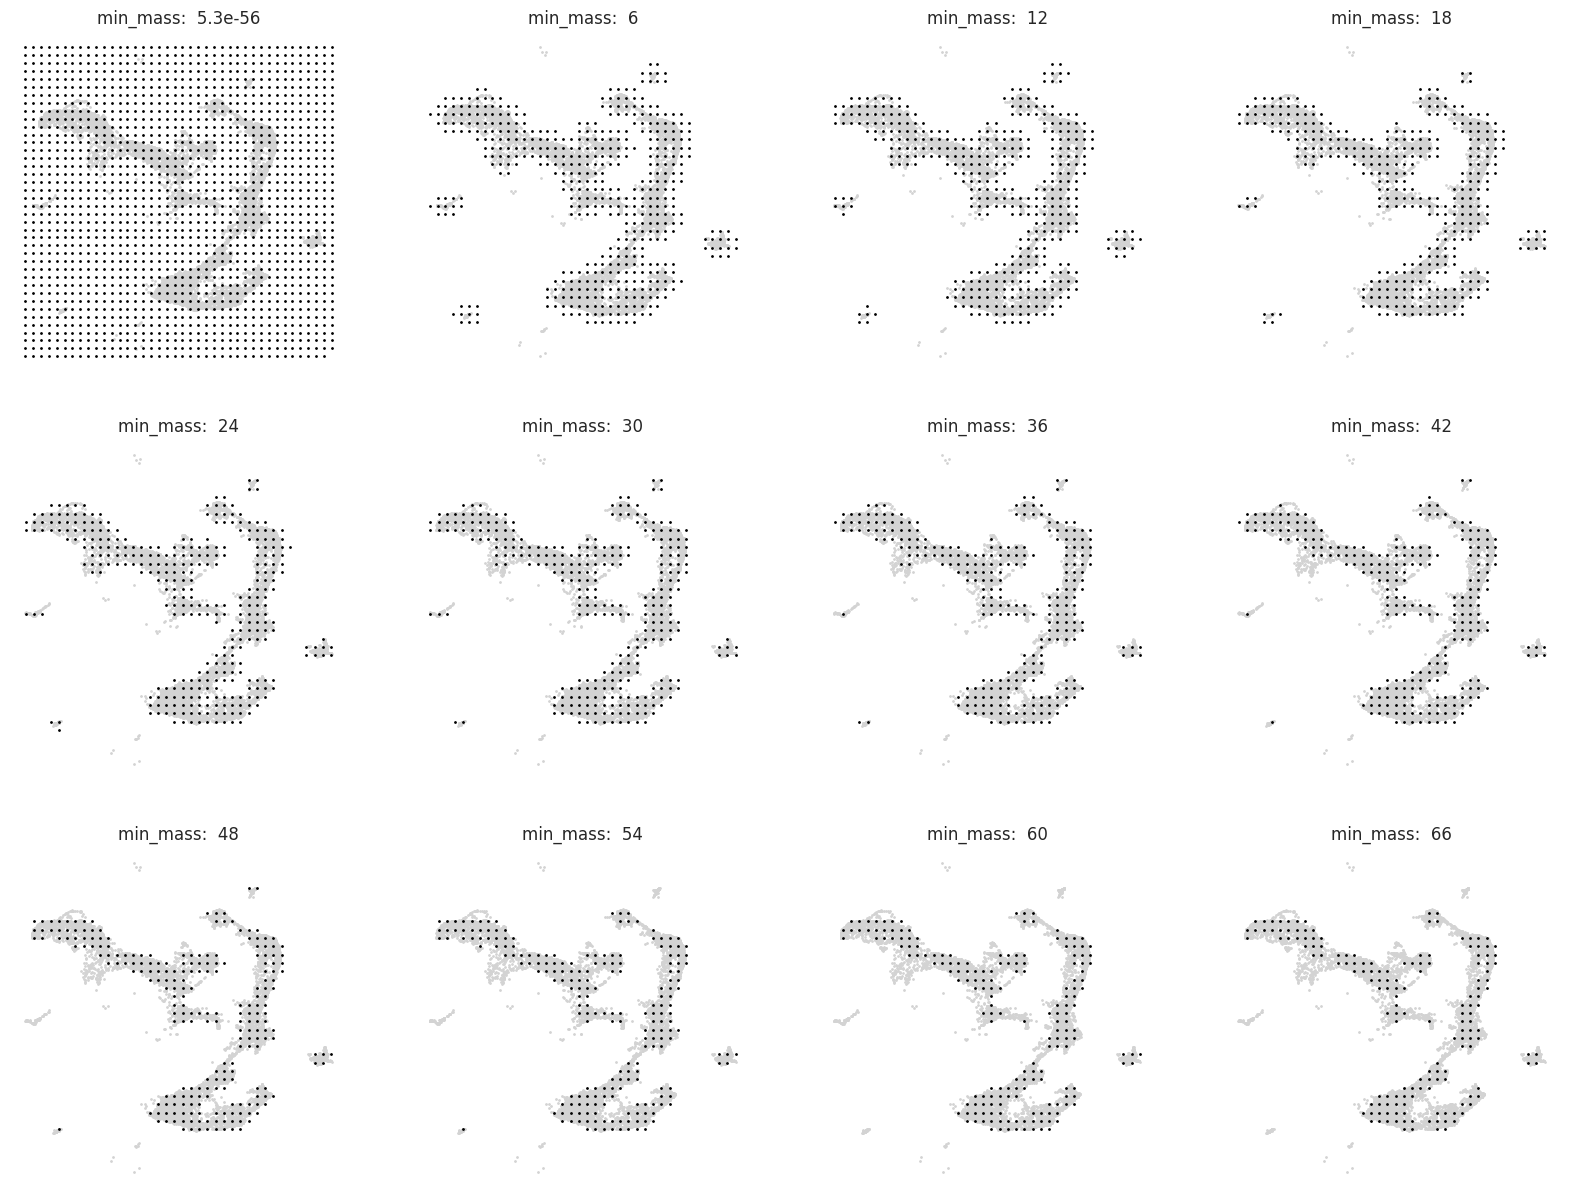

In [9]:
# n_grid = 40 is a good starting value.
n_grid = 40
oracle.calculate_p_mass(smooth=0.8, n_grid=n_grid, n_neighbors=200)

# Search for best min_mass.
oracle.suggest_mass_thresholds(n_suggestion=12)

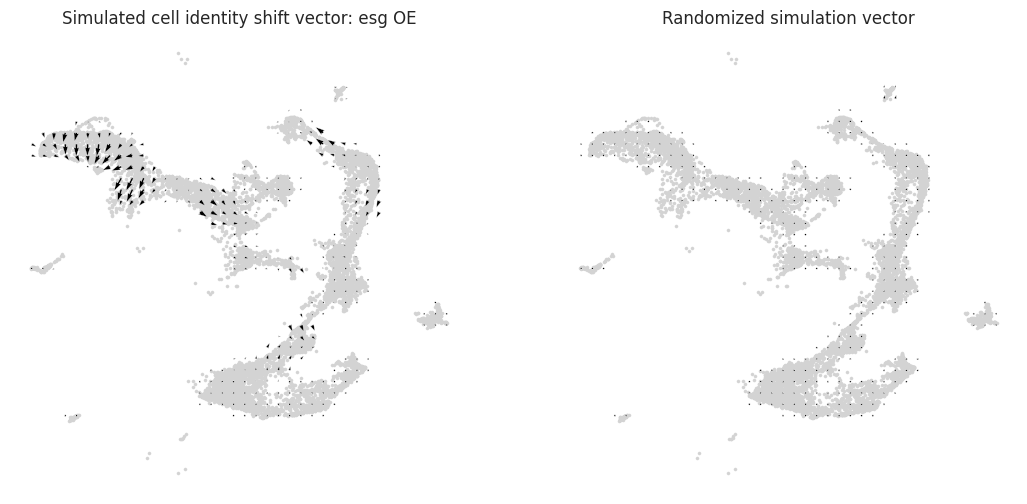

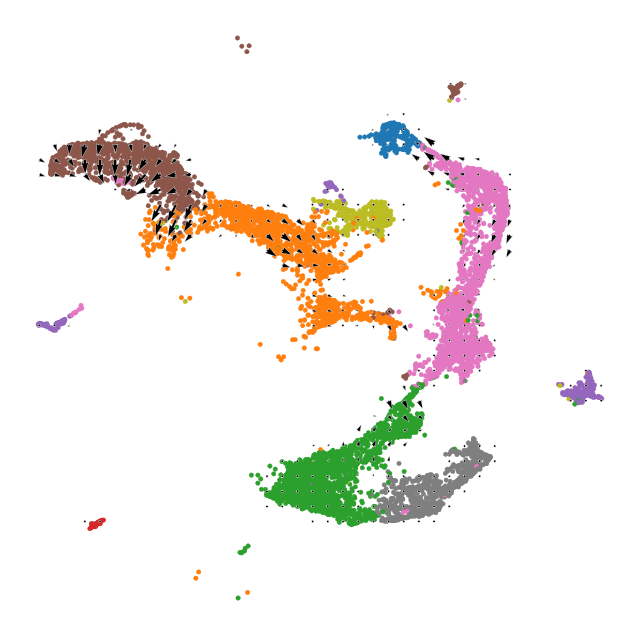

In [11]:
oracle.calculate_mass_filter(min_mass=30, plot=False)

fig, ax = plt.subplots(1, 2,  figsize=[13, 6])

scale_simulation = 10
# Show quiver plot
oracle.plot_simulation_flow_on_grid(scale=scale_simulation, ax=ax[0])
ax[0].set_title(f"Simulated cell identity shift vector: {goi} OE")

# Show quiver plot that was calculated with randomized graph.
oracle.plot_simulation_flow_random_on_grid(scale=scale_simulation, ax=ax[1])
ax[1].set_title(f"Randomized simulation vector")

plt.show()

# Plot vector field with cell cluster
fig, ax = plt.subplots(figsize=[8, 8])

oracle.plot_cluster_whole(ax=ax, s=10)
oracle.plot_simulation_flow_on_grid(scale=scale_simulation, ax=ax, show_background=False)

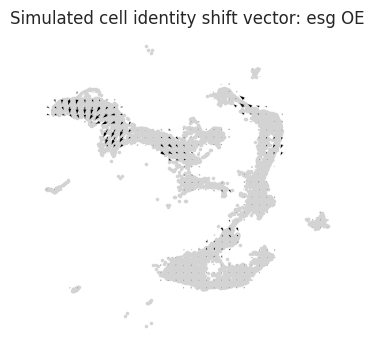

In [13]:
for goi in ["esg"]:
    fig, ax = plt.subplots(1, 1,  figsize=[4, 4])
    oracle.simulate_shift(perturb_condition={goi: 0.5}, n_propagation=3)
    oracle.estimate_transition_prob(n_neighbors=200, knn_random=True, sampled_fraction=1)
    oracle.calculate_embedding_shift(sigma_corr=0.05)
    oracle.calculate_p_mass(smooth=0.8, n_grid=n_grid, n_neighbors=200)
    oracle.plot_simulation_flow_on_grid(scale=10, ax=ax)
    ax.set_title(f"Simulated cell identity shift vector: {goi} OE")
    fig.show()

In [ ]:
for goi in ["bs","esg","kni"]:
    fig, ax = plt.subplots(1, 1,  figsize=[4, 4])
    oracle.simulate_shift(perturb_condition={goi: 0.0}, n_propagation=3)
    oracle.estimate_transition_prob(n_neighbors=200, knn_random=True, sampled_fraction=1)
    oracle.calculate_embedding_shift(sigma_corr=0.05)
    oracle.calculate_p_mass(smooth=0.8, n_grid=n_grid, n_neighbors=200)
    oracle.plot_simulation_flow_on_grid(scale=10, ax=ax)
    ax.set_title(f"Simulated cell identity shift vector: {goi} KO")
    fig.show()

In [ ]:
def group_patch(adata, func, layer, group_by, *arg, **kwarg):
    groups = np.unique(adata.obs[group_by])
    return [func(adata.layers[layer][adata.obs[group_by] == gr], *arg, **kwarg) for gr in groups], groups

In [ ]:
# computing similarity
aver_expr, clusters = group_patch(oracle.adata, np.mean, "simulated_count", "Classification1", axis=0)
vec_length = np.expand_dims(np.linalg.norm(aver_expr, ord=2, axis=1), axis=0)
cos_similarity1 = (np.array(aver_expr) @ np.array(aver_expr).T) / (vec_length.T @ vec_length)
cos_similarity1[5]

array([0.79733852, 0.92112419, 0.82608328, 0.82640227, 0.91333261,
       1.        , 0.83052606, 0.78981585, 0.89359721])

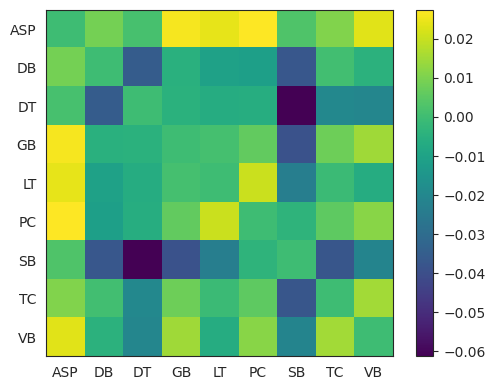

In [ ]:
plt.imshow(cos_similarity1-cos_similarity2, cmap='viridis')
plt.colorbar()
plt.xticks(np.arange(9), labels=clusters)
plt.yticks(np.arange(9), labels=clusters)
plt.show()

In [ ]:
aver_expr, clusters = group_patch(oracle.adata, np.mean, "imputed_count", "Classification1", axis=0)
vec_length = np.expand_dims(np.linalg.norm(aver_expr, ord=2, axis=1), axis=0)
cos_similarity2 = (np.array(aver_expr) @ np.array(aver_expr).T) / (vec_length.T @ vec_length)

In [ ]:
cos_similarity2[5]

array([0.769962  , 0.93237123, 0.83223186, 0.82049971, 0.89303316,
       1.        , 0.83406387, 0.7843231 , 0.88187423])

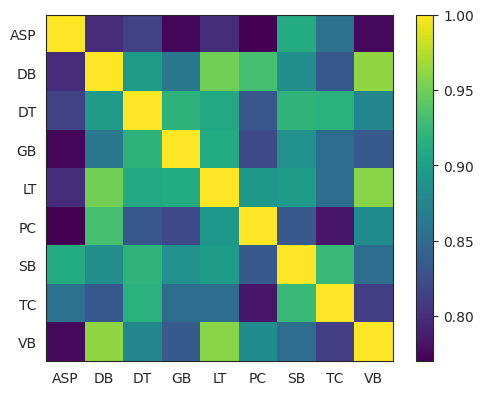

In [ ]:
plt.imshow(cos_similarity, cmap='viridis')
plt.colorbar()
plt.xticks(np.arange(9), labels=clusters)
plt.yticks(np.arange(9), labels=clusters)
plt.show()

# PAGA

In [3]:
adata = sc.read("/home/zju/tianfeng/single_cell_atlas/processed_data_file/ctrl_filtered.h5ad")

In [7]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=50, n_pcs=40)
sc.tl.paga(adata, groups='celltype')

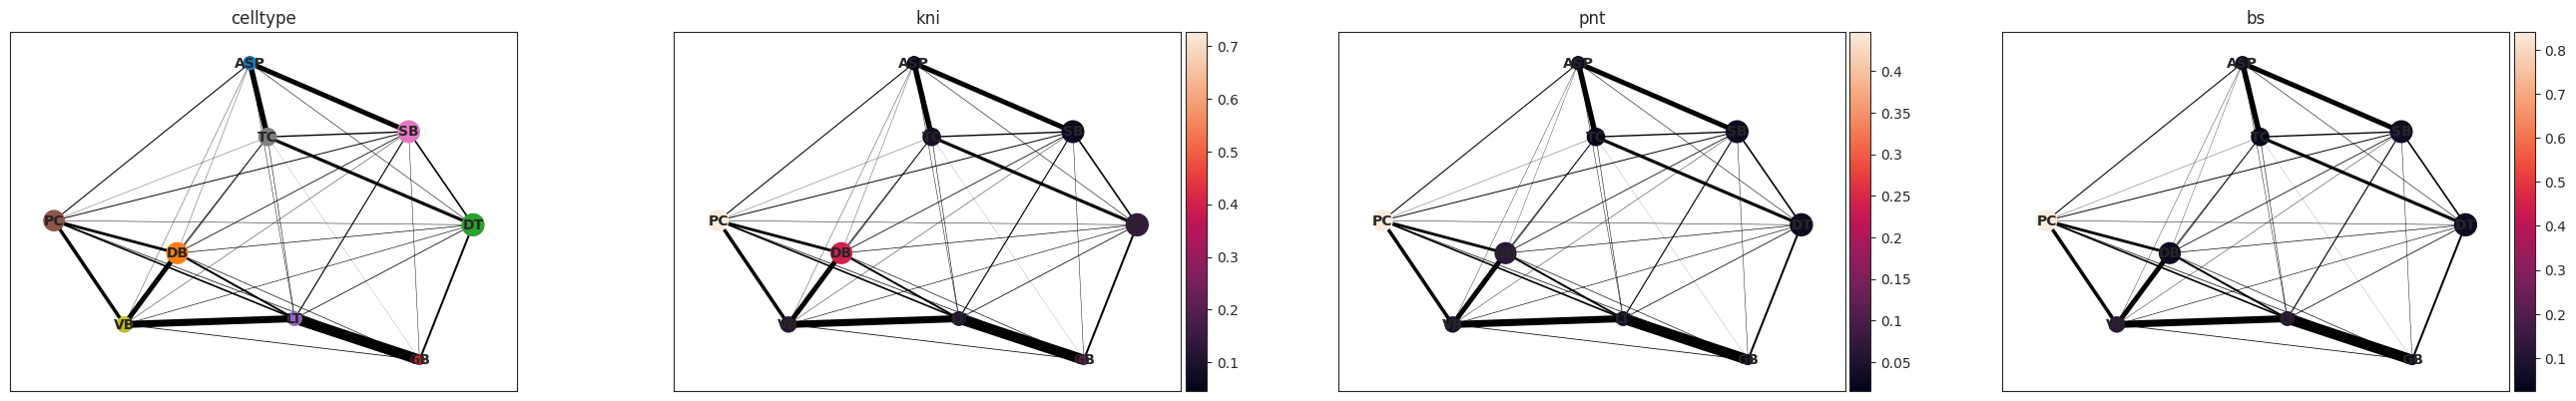

In [8]:
sc.pl.paga(adata, color=['celltype', 'kni', 'pnt', 'bs'])